Dataset Shape: (200, 4)

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Correlation Matrix:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


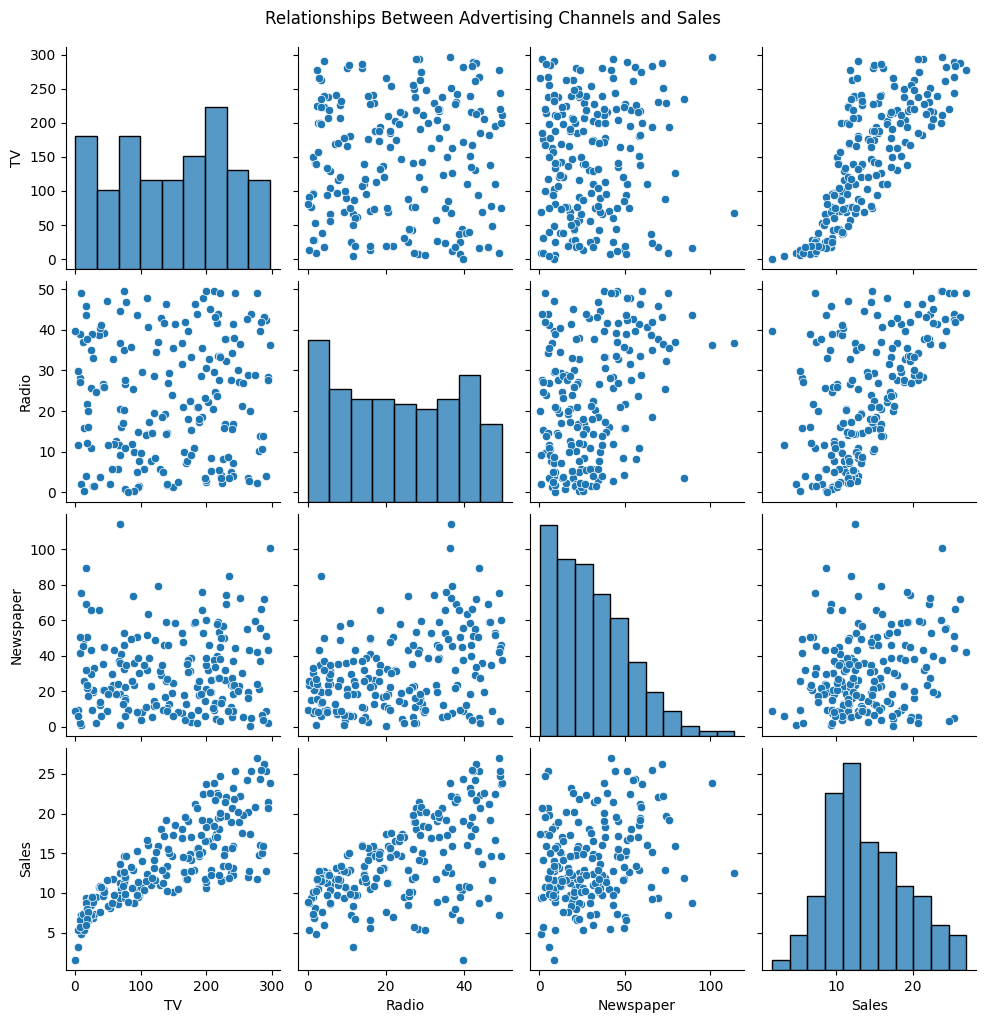

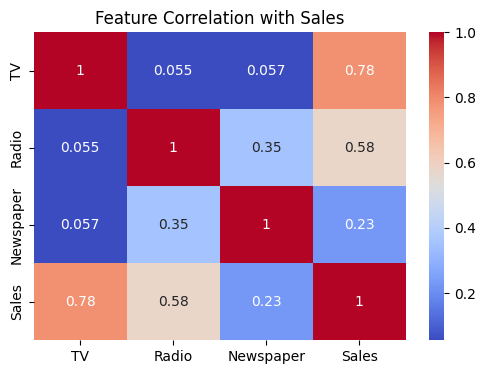


📊 Model Evaluation:
Linear Regression R²: 0.899
Linear Regression MAE: 1.461

Random Forest R²: 0.981
Random Forest MAE: 0.62


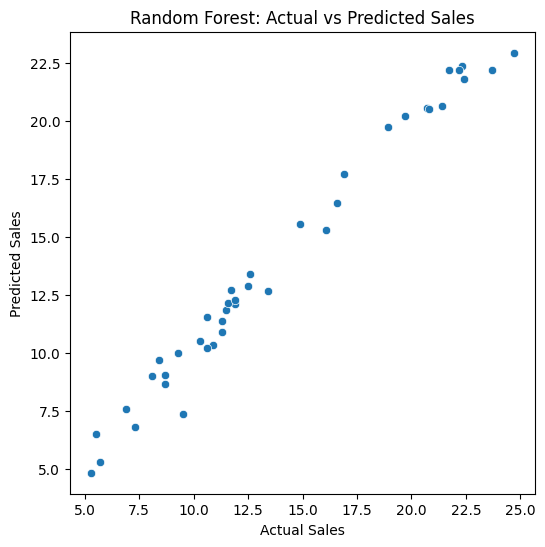

C:\Users\Admin\AppData\Local\Temp\ipykernel_21248\2153482347.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


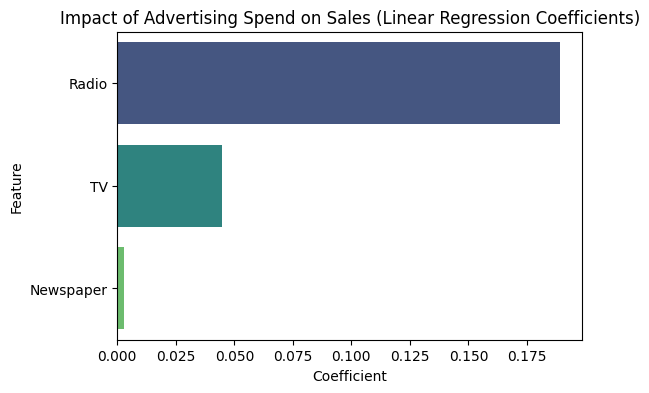


📈 Insights:
- TV advertising has the strongest positive correlation with Sales.
- Radio has a moderate impact.
- Newspaper spending contributes the least to sales.


In [1]:
# Sales Prediction using Advertising Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("Advertising.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)  # Remove index column

# --- Data Exploration ---
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nCorrelation Matrix:\n", df.corr())

# --- Visualization: Relationships ---
sns.pairplot(df)
plt.suptitle("Relationships Between Advertising Channels and Sales", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Sales")
plt.show()

# --- Features and Target ---
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Model 2: Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- Evaluation ---
print("\n📊 Model Evaluation:")
print("Linear Regression R²:", round(r2_score(y_test, y_pred_lr), 3))
print("Linear Regression MAE:", round(mean_absolute_error(y_test, y_pred_lr), 3))

print("\nRandom Forest R²:", round(r2_score(y_test, y_pred_rf), 3))
print("Random Forest MAE:", round(mean_absolute_error(y_test, y_pred_rf), 3))

# --- Visualization: Actual vs Predicted ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.show()

# --- Advertising Impact Analysis ---
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title("Impact of Advertising Spend on Sales (Linear Regression Coefficients)")
plt.show()

print("\n📈 Insights:")
print("- TV advertising has the strongest positive correlation with Sales.")
print("- Radio has a moderate impact.")
print("- Newspaper spending contributes the least to sales.")
